Custom functions - Mean: -0.03828, Std Dev: 1.00317
NumPy functions - Mean: -0.03828, Std Dev: 1.00317


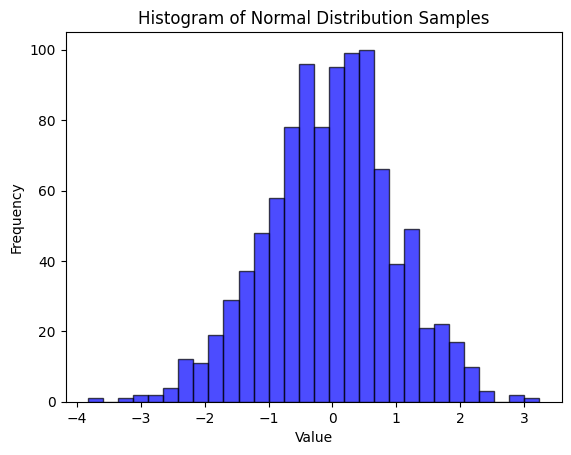

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def mean(data):
    return sum(data) / len(data)

def standard_deviation(data):
    mu = mean(data)
    return np.sqrt(sum((x - mu) ** 2 for x in data) / len(data))

# Sample data from a normal distribution (-3->3)
mu, stdDev = 0, 1 
samples = stats.norm(mu, stdDev).rvs(1000)

# Compute mean and standard deviation using custom functions
customMean = mean(samples)
customStd = standard_deviation(samples)

# Compute mean and standard deviation using numpy functions
numpyMean = np.mean(samples)
numpyStd = np.std(samples)

# Print results to verify
print("Custom functions - Mean: {:.5f}, Std Dev: {:.5f}".format(customMean, customStd))
print("NumPy functions - Mean: {:.5f}, Std Dev: {:.5f}".format(numpyMean, numpyStd))

# Plot histogram of the samples
plt.hist(samples, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Normal Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



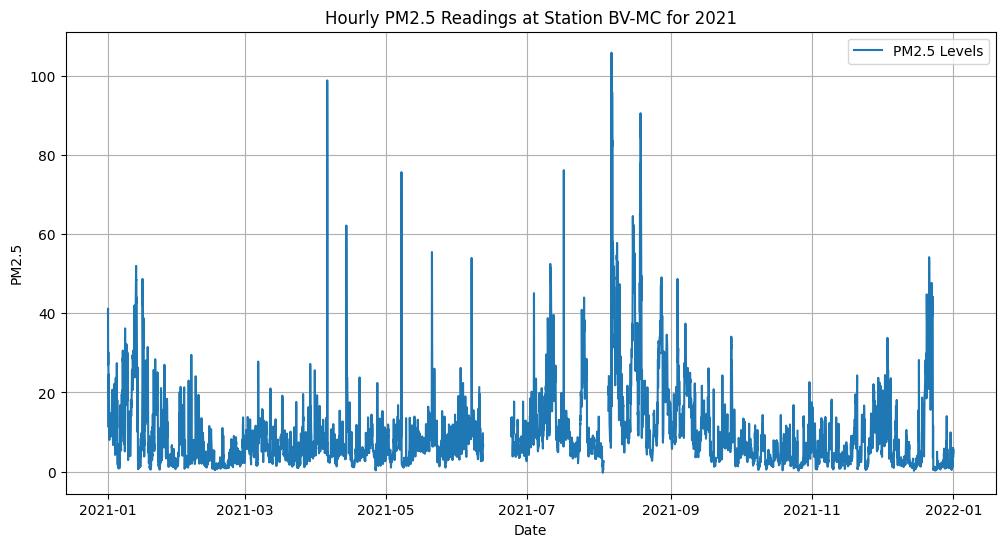

In [9]:
#Load the Data
import pandas as pd
df = pd.read_csv('2021-PM2.5.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for station BV-MC
station_data = df[['Date', 'BV-MC']].copy()  

# Plotting the data across the year
plt.figure(figsize=(12, 6))
plt.plot(station_data['Date'], station_data['BV-MC'], label='PM2.5 Levels')
plt.title('Hourly PM2.5 Readings at Station BV-MC for 2021')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()

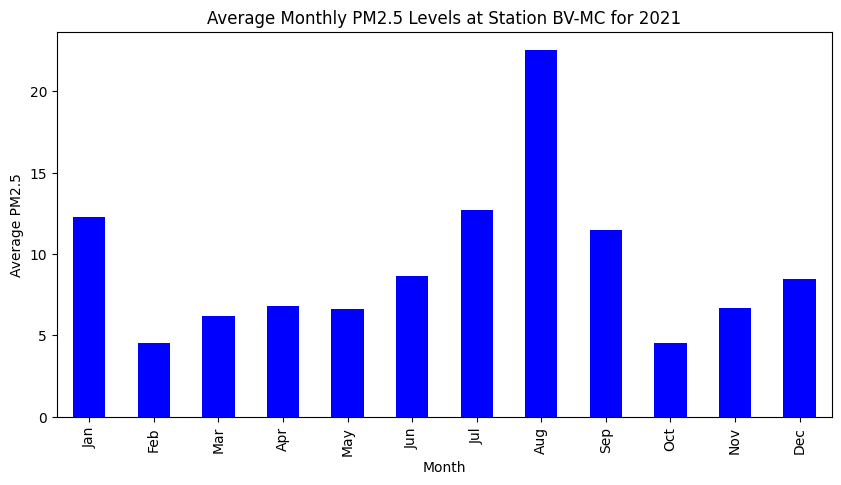

In [18]:
# Monthly means for 'BV-MC' station
monthly_means = station_data.groupby(station_data['Date'].dt.month)['BV-MC'].mean()
plt.figure(figsize=(10, 5))
monthly_means.plot(kind='bar', color='blue')
plt.title('Average Monthly PM2.5 Levels at Station BV-MC for 2021')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Insights from Monthly Mean PM2.5 Levels Visualization
- **Significant Observation**: There is a significant spike in average PM2.5 levels during the month of August in 2021. This could suggest seasonal factors affecting air quality, such as increased wildfires or changes in weather patterns that could trap pollutants.

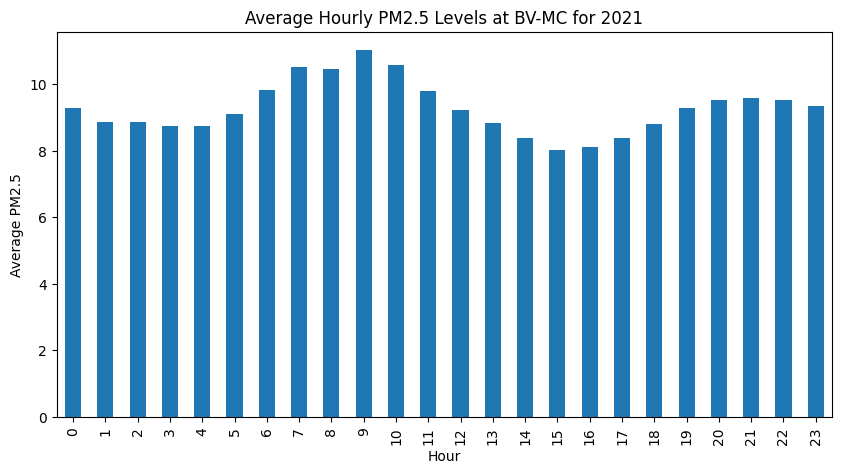

In [12]:
# Hourly means
hourly_means = station_data.groupby(station_data['Date'].dt.hour)['BV-MC'].mean()
plt.figure(figsize=(10, 5))
hourly_means.plot(kind='bar')
plt.title('Average Hourly PM2.5 Levels at BV-MC for 2021')
plt.xlabel('Hour')
plt.ylabel('Average PM2.5')
plt.show()

## Insights from Hourly PM2.5 Levels Visualization
- **Daily Variations**: This plot reveals how pollution levels typically vary throughout the day. For instance, there is a higher concentration in early morning with a dip around midday. This pattern could be tied to motor vehicle usage being higher during morning work commutes and less traffic during the middle of the day. 

<Figure size 1000x500 with 0 Axes>

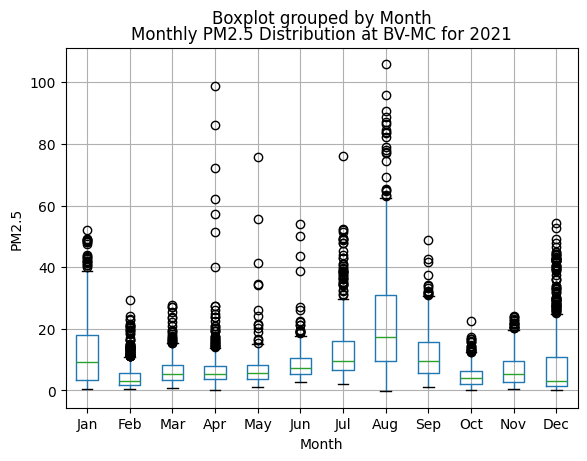

In [16]:
# Box plots for monthly distributions
station_data['Month'] = station_data['Date'].dt.month

# Box plots for monthly distributions
plt.figure(figsize=(10, 5))
station_data.boxplot(column='BV-MC', by='Month')
plt.title('Monthly PM2.5 Distribution at BV-MC for 2021')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


<Figure size 1000x500 with 0 Axes>

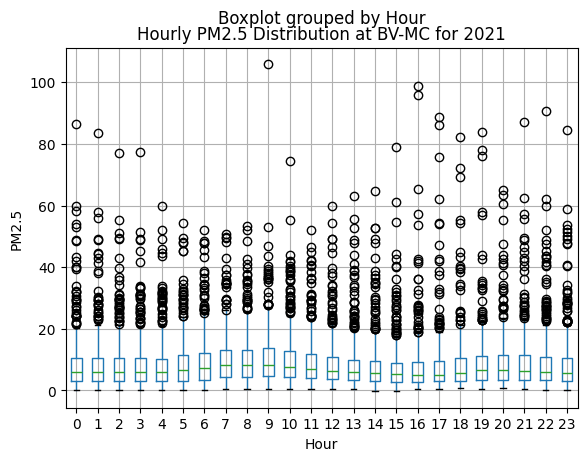

In [20]:
# Box plots for monthly distributions
station_data['Hour'] = station_data['Date'].dt.hour

plt.figure(figsize=(10, 5))
station_data.boxplot(column='BV-MC', by='Hour')
plt.title('Hourly PM2.5 Distribution at BV-MC for 2021')
plt.xlabel('Hour')
plt.ylabel('PM2.5')
plt.show()

## Additional Insights from Box and Whisker Plots
- **Data Distribution and Variability**: You can observe the median, quartiles, and outliers for each month and hour, giving insight into the range and variability of pollution levels.
- **Consistent vs. Variable Months**: Some months, like October and November, show a narrow range indicating more consistent pollution levels throughout the month.
- **Episodic Events**: Can also identify hours/months with higher variability and the presence of outliers, like seen in the month of April, which can indicate episodic pollution events like sudden changes in weather.
